### Import Moduels

In [45]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.pyplot import figure
from IPython.display import display
import requests                   
import json                                  
import datetime as dt

### Input Start and End Dates

In [46]:
startTime = dt.datetime(2021, 1, 1) # Start Date (Year, Month, Day)
endTime = dt.datetime(2021, 3, 31) # Start Date (Year, Month, Day)

### Pull Data and Initialize Variables

In [47]:
Contracts_List = ['EOSUSD_PERP','FILUSD_PERP','BCHUSD_PERP','LINKUSD_PERP','BTCUSD_PERP','ETCUSD_PERP','XRPUSD_PERP','EGLDUSD_PERP','LTCUSD_PERP','DOTUSD_PERP','ETHUSD_PERP','ADAUSD_PERP','BNBUSD_PERP','TRXUSD_PERP','DOGEUSD_PERP']
Contracts_Dict = {'EOSUSD_PERP','FILUSD_PERP','BCHUSD_PERP','LINKUSD_PERP','BTCUSD_PERP','ETCUSD_PERP','XRPUSD_PERP','EGLDUSD_PERP','LTCUSD_PERP','DOTUSD_PERP','ETHUSD_PERP','ADAUSD_PERP','BNBUSD_PERP','TRXUSD_PERP','DOGEUSD_PERP'}

In [48]:
def DataPeriod(symbol, startTime, endTime):
    
    """This function gathers all funding rate data 
    for the specified contract during the specified time period """
    
    # Initialize URL and Parameters
    url = "https://dapi.binance.com/dapi/v1/fundingRate"
    symbol = symbol
    startTime = str(int(startTime.timestamp()*1000))
    endTime = str(int(endTime.timestamp()*1000))
    limit = '1000'
    req_params = {"symbol": symbol, "startTime": startTime, "endTime": endTime, "limit": limit}

    # Make DataFrame
    df = pd.DataFrame(json.loads(requests.get(url, params = req_params).text))
    
    # Convert funding times from miliseconds to date
    fundingTime_ms = df['fundingTime'].tolist()
    fundingTime_date = []
    for timestamp in fundingTime_ms:
        date = str(dt.datetime.fromtimestamp(timestamp/1000))
        fundingTime_date.append(date[:16])
    df['fundingTime'] = fundingTime_date
    
    # Convert funding rates from strings to floats 
    fundingRate_string = df['fundingRate'].tolist()
    fundingRate_float = []
    for fundingRate in fundingRate_string:
        rate = float(fundingRate)
        fundingRate_float.append(rate)
    df['fundingRate'] = fundingRate_float
    
    return df

In [49]:
EOS = DataPeriod('EOSUSD_PERP', startTime, endTime)
FIL = DataPeriod('FILUSD_PERP', startTime, endTime)
BCH = DataPeriod('BCHUSD_PERP', startTime, endTime)
LINK = DataPeriod('LINKUSD_PERP', startTime, endTime)
BTC = DataPeriod('BTCUSD_PERP', startTime, endTime)
ETC = DataPeriod('ETCUSD_PERP', startTime, endTime)
XRP = DataPeriod('XRPUSD_PERP', startTime, endTime)
EGLD = DataPeriod('EGLDUSD_PERP', startTime, endTime)
LTC = DataPeriod('LTCUSD_PERP', startTime, endTime)
DOT = DataPeriod('DOTUSD_PERP', startTime, endTime)
ETH = DataPeriod('ETHUSD_PERP', startTime, endTime)
ADA = DataPeriod('ADAUSD_PERP', startTime, endTime)
BNB = DataPeriod('BNBUSD_PERP', startTime, endTime)
TRX = DataPeriod('TRXUSD_PERP', startTime, endTime)
DOGE = DataPeriod('DOGEUSD_PERP', startTime, endTime)

Crypto_list = [EOS, FIL, BCH, LINK, BTC, ETC, XRP, EGLD, LTC, DOT, ETH, ADA, BNB, TRX, DOGE]
Crypto_keys = ['EOS','FIL','BCH','LINK','BTC','ETC','XRP','EGLD','LTC','DOT','ETH','ADA','BNB','TRX','DOGE']

### Predefined Functions and Dictionaries

In [70]:
def Graph(Cryptos):
    
    """ This Function returns the time series plot of the specified contract
    NOTE: Contracts must be inserted as parameters from oldest to newest"""

    Legend = []

    for Crypto in Cryptos: 
        
        # Plot Values
        Dates = Crypto['fundingTime'].tolist()
        Rates = Crypto['fundingRate'].tolist()
        
        # Plot Settings
        plt.rcParams["figure.figsize"] = (20,12)
        plt.plot(Dates, Rates)
        plt.xlabel('Date & Time', size=15)
        plt.ylabel('Funding Rate', size=15)
        plt.xticks(Dates[::21], rotation=90)
        
        # Plot Legend 
        for Key in Crypto_keys:
            if Crypto['symbol'].loc[0][:-8] == Key:
                Legend.append(Key)
        plt.legend(Legend, fontsize=15)

In [71]:
def Describe(Crypto):
    
    """This function returns descriptive data of the specified contract"""
    
    # Make DataFrame
    Values = Crypto['fundingRate'].describe()
    df = pd.DataFrame(Values)
    
    # Rename Column
    for Key in Crypto_keys:
        if Crypto['symbol'].loc[0][:-8] == Key:
            df_new = df.rename(columns={'fundingRate': Key})

            return df_new         

In [72]:
### Creat Contract Dictionary
Crypto_dict={}

# Keys
for i in Crypto_keys:
    Crypto_dict[i]=[]

# Values
for (List,Key) in zip(Crypto_list,Crypto_keys):
    Crypto_dict[Key].append(List['fundingRate'].tolist())

### Mean-Variance Analysis

In [73]:
### Mean and Standard Deviation of each Contract
avg_list=[]
std_list=[]

for i in Crypto_dict.values():
    
    # Mean
    avg=np.mean(i)
    avg_list.append(avg)
    
    # Standard Deviation
    std=np.std(i)
    std_list.append(std)

,Ticker,Avg,Std
7,EGLD,0.000915,0.000991
9,DOT,0.000542,0.000784
14,DOGE,0.000541,0.000848
12,BNB,0.000533,0.000890
10,ETH,0.000503,0.000531
1,FIL,0.000478,0.000577
8,LTC,0.000474,0.000429
6,XRP,0.000469,0.000450
4,BTC,0.000459,0.000434
11,ADA,0.000450,0.000614


Text(0.5, 1.0, 'Standard Deviation of Funding Rate')

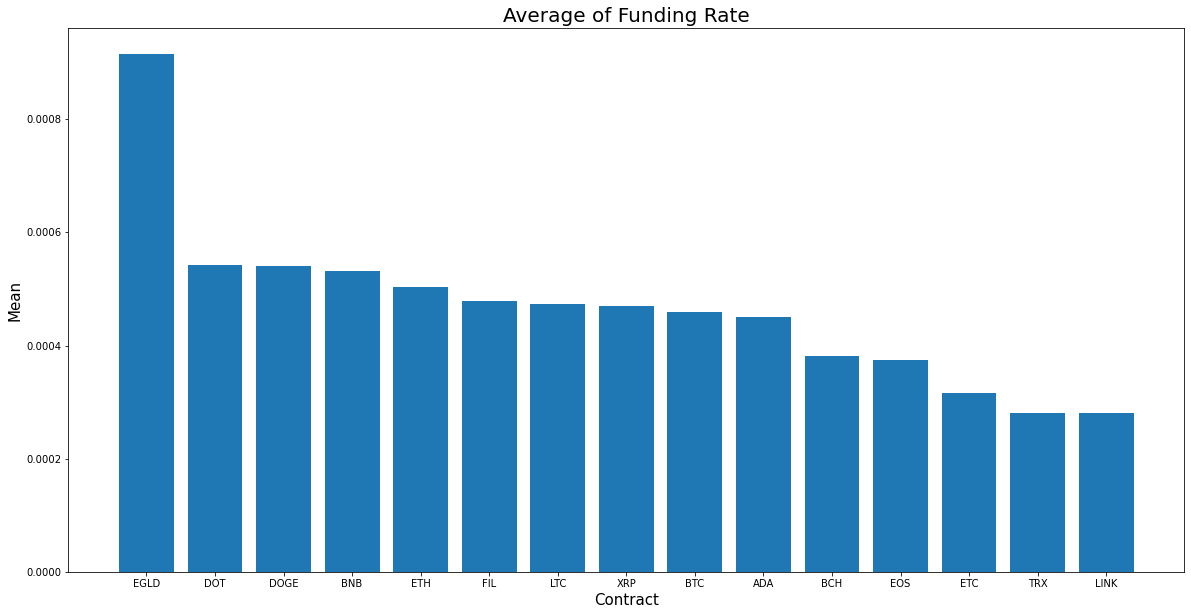

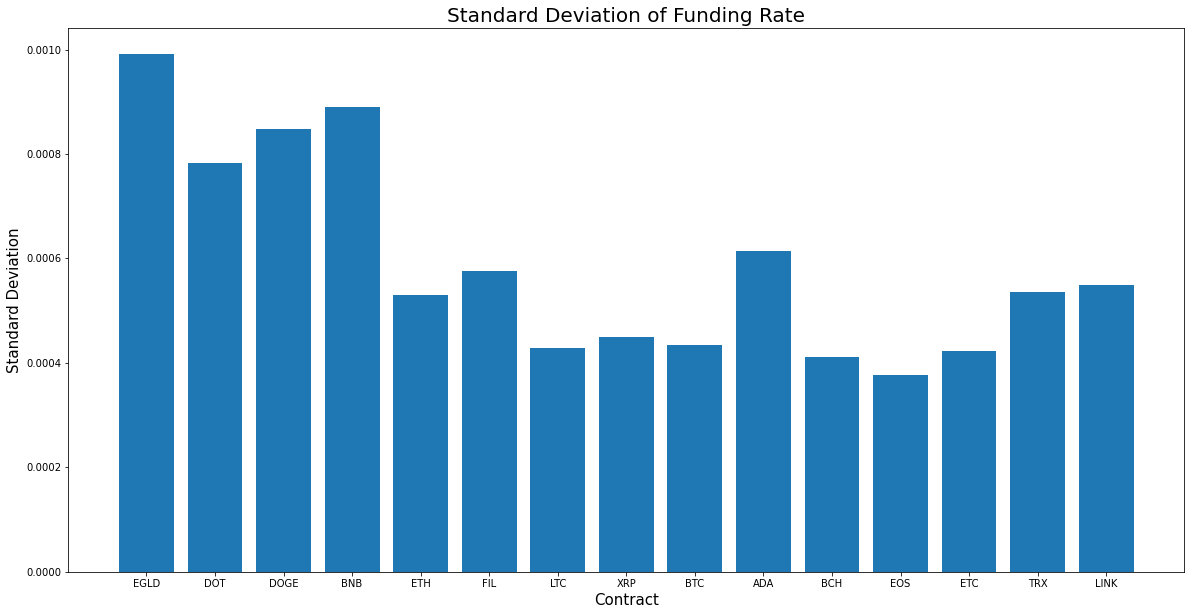

In [74]:
# DataFrame of Means and Standard Deviations
mean_var_dict={'Ticker': Crypto_keys,
              'Avg': avg_list,
              'Std': std_list}
mean_var_df=pd.DataFrame(mean_var_dict)
mean_var_df_sorted=mean_var_df.sort_values(['Avg'],ascending=False)
display(mean_var_df_sorted)

# Bargraph of Means
x1=mean_var_df_sorted['Ticker'].tolist()
y1=mean_var_df_sorted['Avg'].tolist()
plt.figure(figsize=(20,10))
plt.bar(x1,y1)
plt.xlabel('Contract', size=15)
plt.ylabel('Mean', size=15)
plt.title('Average of Funding Rate', size=20)

# Bargraph of Standard Deviations
x2=mean_var_df_sorted['Ticker'].tolist()
y2=mean_var_df_sorted['Std'].tolist()
plt.figure(figsize=(20,10))
plt.bar(x2,y2)
plt.xlabel('Contract', size=15)
plt.ylabel('Standard Deviation', size=15)
plt.title('Standard Deviation of Funding Rate', size=20)

In [75]:
### Mean Variances Preferences of each Contract
# Condition 1: If a contract i has a lower mean and higher standard deviation than contract j, drop contract i
# Condition 2: If a contract j has a lower mean and higher standard deviation than contract i, drop contract j

drop=[]

# First Loop
for i in range(15):
    avg_i=float(mean_var_df.loc[i,['Avg']])
    std_i=float(mean_var_df.loc[i,['Std']])
    ticker_i=mean_var_df.loc[i,['Ticker']].item()
    index_i=mean_var_df.index[i]
        
    # Second Loop
    for j in range(15): 
        avg_j=float(mean_var_df.loc[j,['Avg']])
        std_j=float(mean_var_df.loc[j,['Std']])
        ticker_j=mean_var_df.loc[j,['Ticker']].item()
        index_j=mean_var_df.index[j]
        
        # Condition 1
        if avg_i<avg_j and std_i>std_j:
            if index_i not in drop:
                drop.append(index_i)
        
        # Condition 2:
        elif avg_i>avg_j and std_i<std_j:
            if index_j not in drop:
                drop.append(index_j)

mean_var_list=[]
for i in range(15):
    if i not in drop:
        mean_var_list.append(i)
        
MVP=mean_var_df.drop(mean_var_df.index[[drop]])
MVP.sort_values(['Avg'], ascending=False)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexes/base.py:4111: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Ticker,Avg,Std
7,EGLD,0.000915,0.000991
9,DOT,0.000542,0.000784
10,ETH,0.000503,0.000531
8,LTC,0.000474,0.000429
2,BCH,0.000382,0.000411
0,EOS,0.000374,0.000378


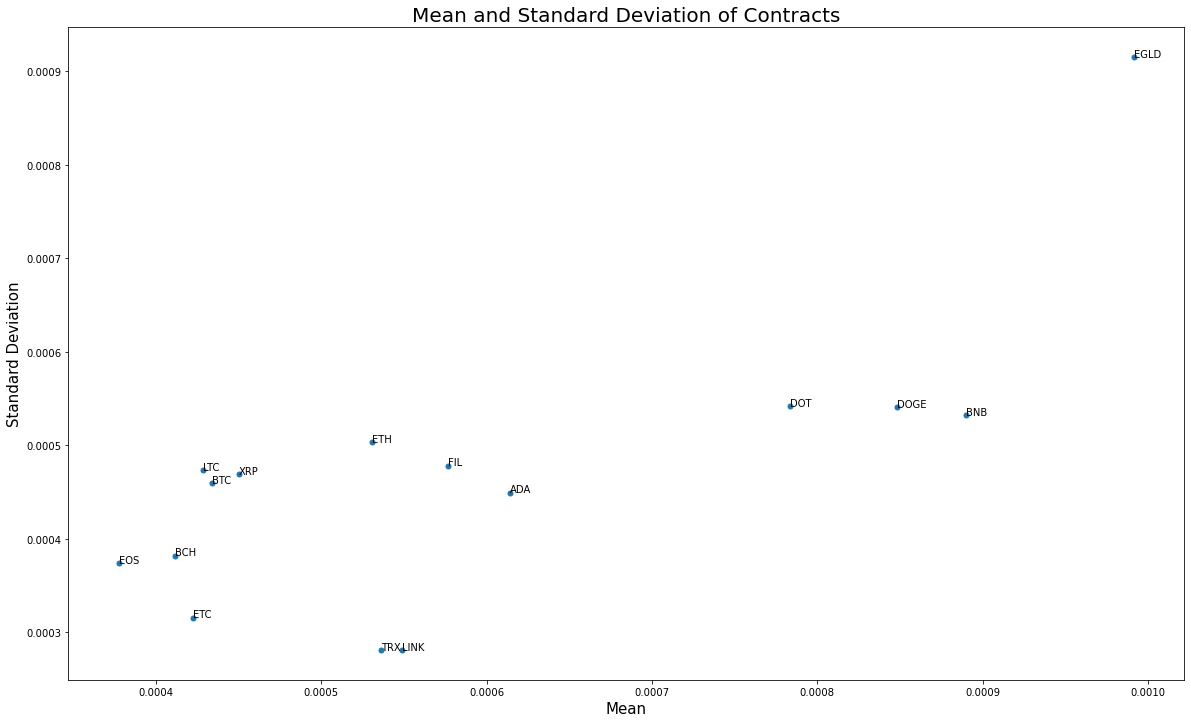

In [76]:
### Scatter Plot of Means and Standard Deviations of Contracts

# Values
y = avg_list
x = std_list
n = Crypto_keys

# Plot
plt.figure(figsize=(20,12))
plt.plot(x,y,'.',markersize=10)
plt.xlabel('Mean', size=15)
plt.ylabel('Standard Deviation', size=15)
plt.title('Mean and Standard Deviation of Contracts', size=20)

# Lables
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))
    if n in mean_var_list:
        plt.plot(x,y,'.r',markersize=10)

### Over-Under Analysis

In [77]:
def Over(x):
    
    """This function calculates the percentage of funding rate observations 
    that are over the specified threshold"""

    number_of_obvs=[]
    greater_than_x=[]

    for Crypto in Crypto_list:
            
        # Funding Rates
        Rates = Crypto['fundingRate'].tolist()
        # Total Amount of Funding Rates
        n=len(Rates)
        number_of_obvs.append(n) 
    
        # Funding Rates that are greater than X
        curr_list_bigger=[]
        for Rate in Rates:
            if Rate>=x:
                curr_list_bigger.append(Rate)
        # Amount of Funding Rates that are greater than X   
        n=len(curr_list_bigger)
        greater_than_x.append(n) 
    
    # Percentage of Funding Rates that are greater than x
    percent_over_x=[]
    for (i,j) in zip(greater_than_x,number_of_obvs):
        percent=np.round((i/j)*100,2)
        percent_over_x.append(percent)
    
    # DataFrame
    mean_var_df['Amount Obvs over X']=greater_than_x
    mean_var_df['Total Obvs']=number_of_obvs
    mean_var_df['% over X']=percent_over_x
    sorted_df=mean_var_df.sort_values(['% over X'],ascending=False)
    
    # Bar Graph
    x=sorted_df['Ticker'].tolist()
    y=sorted_df['% over X'].tolist()
    plt.figure(figsize=(20,10))
    sorted_bar=plt.bar(x,y)
    plt.xticks(rotation=90)

    return sorted_df
    return sorted_bar

,Ticker,Avg,Std,Amount Obvs over X,Total Obvs,% over X
7,EGLD,0.000915,0.000991,90,267,33.71
12,BNB,0.000533,0.000890,63,267,23.60
9,DOT,0.000542,0.000784,54,267,20.22
14,DOGE,0.000541,0.000848,33,171,19.30
11,ADA,0.000450,0.000614,46,267,17.23
10,ETH,0.000503,0.000531,44,267,16.48
1,FIL,0.000478,0.000577,43,267,16.10
4,BTC,0.000459,0.000434,36,267,13.48
8,LTC,0.000474,0.000429,35,267,13.11
6,XRP,0.000469,0.000450,34,267,12.73


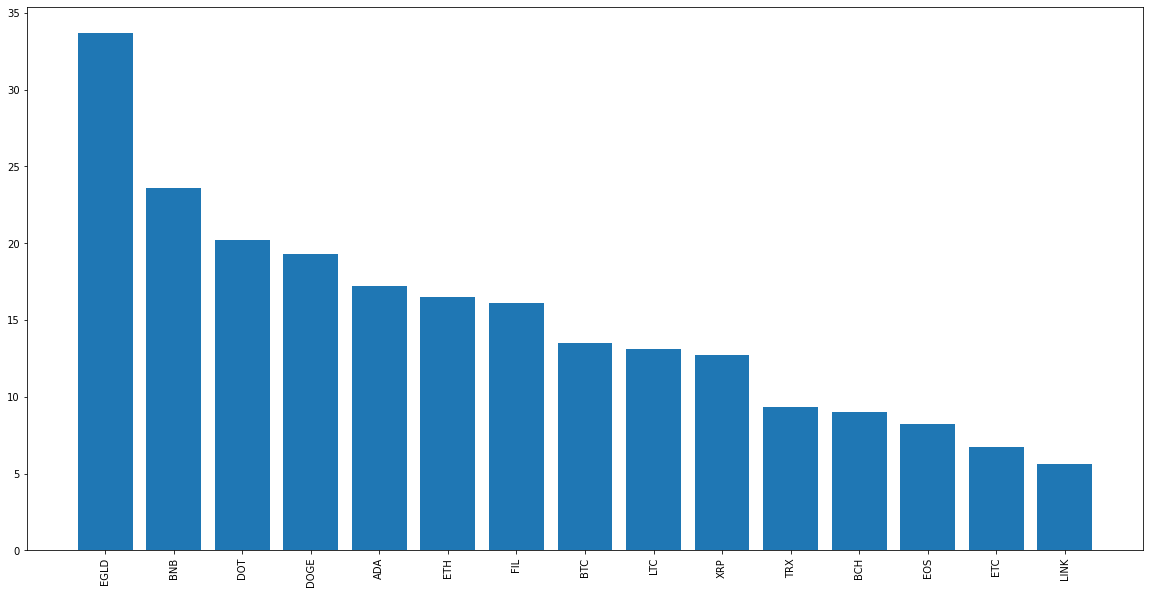

In [78]:
Over(0.001)

,Ticker,Avg,Std,Amount Obvs over X,Total Obvs,% over X
7,EGLD,0.000915,0.000991,149,267,55.81
9,DOT,0.000542,0.000784,115,267,43.07
14,DOGE,0.000541,0.000848,72,171,42.11
10,ETH,0.000503,0.000531,108,267,40.45
1,FIL,0.000478,0.000577,103,267,38.58
6,XRP,0.000469,0.000450,103,267,38.58
8,LTC,0.000474,0.000429,103,267,38.58
12,BNB,0.000533,0.000890,99,267,37.08
4,BTC,0.000459,0.000434,97,267,36.33
11,ADA,0.000450,0.000614,95,267,35.58


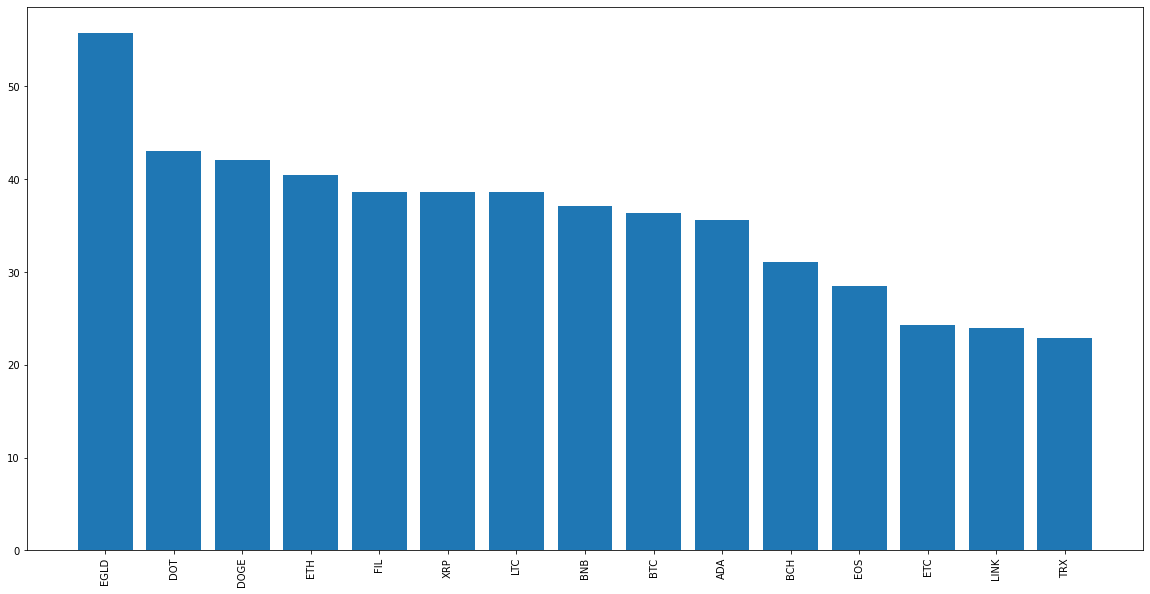

In [79]:
Over(0.0005)

,Ticker,Avg,Std,Amount Obvs over X,Total Obvs,% over X
0,EOS,0.000374,0.000378,266,267,99.63
7,EGLD,0.000915,0.000991,266,267,99.63
2,BCH,0.000382,0.000411,263,267,98.50
6,XRP,0.000469,0.000450,263,267,98.50
4,BTC,0.000459,0.000434,262,267,98.13
9,DOT,0.000542,0.000784,262,267,98.13
14,DOGE,0.000541,0.000848,167,171,97.66
8,LTC,0.000474,0.000429,260,267,97.38
1,FIL,0.000478,0.000577,251,267,94.01
5,ETC,0.000316,0.000423,249,267,93.26


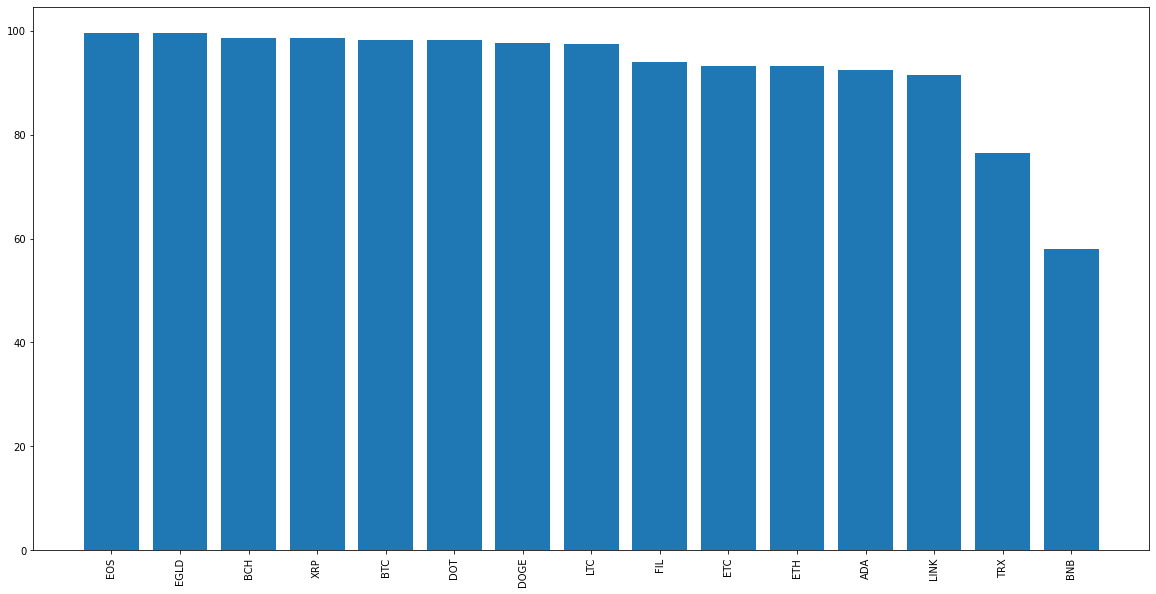

In [81]:
Over(0.0001)

,Ticker,Avg,Std,Amount Obvs over X,Total Obvs,% over X
0,EOS,0.000374,0.000378,266,267,99.63
4,BTC,0.000459,0.000434,266,267,99.63
7,EGLD,0.000915,0.000991,266,267,99.63
9,DOT,0.000542,0.000784,265,267,99.25
6,XRP,0.000469,0.000450,264,267,98.88
2,BCH,0.000382,0.000411,263,267,98.50
8,LTC,0.000474,0.000429,263,267,98.50
14,DOGE,0.000541,0.000848,168,171,98.25
10,ETH,0.000503,0.000531,257,267,96.25
5,ETC,0.000316,0.000423,255,267,95.51


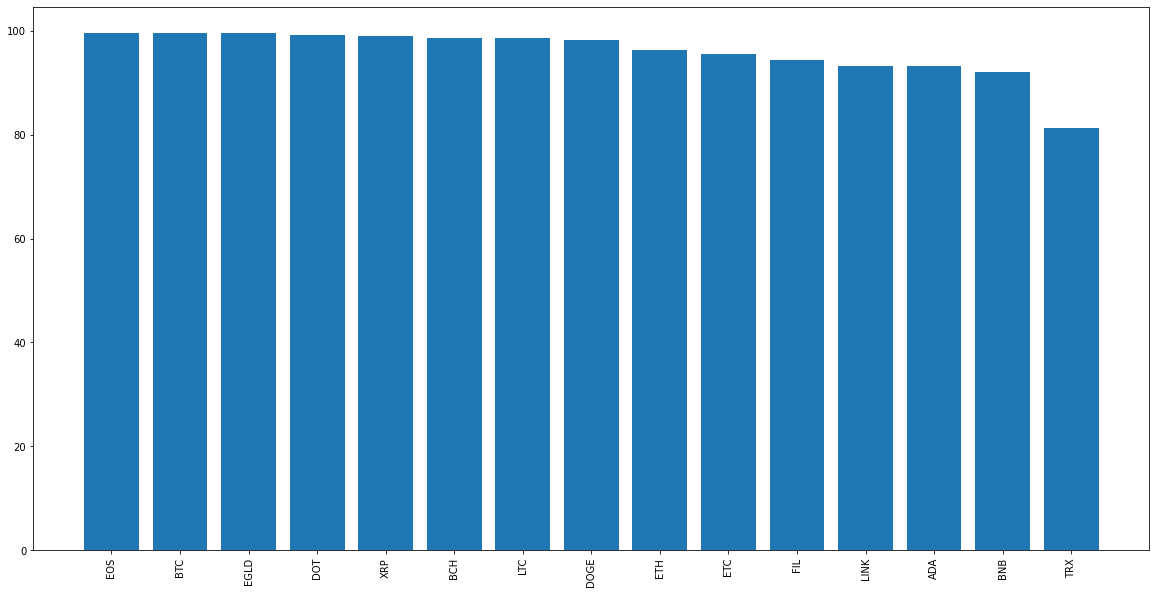

In [82]:
Over(0)

### Time Series and Descriptive Analysis

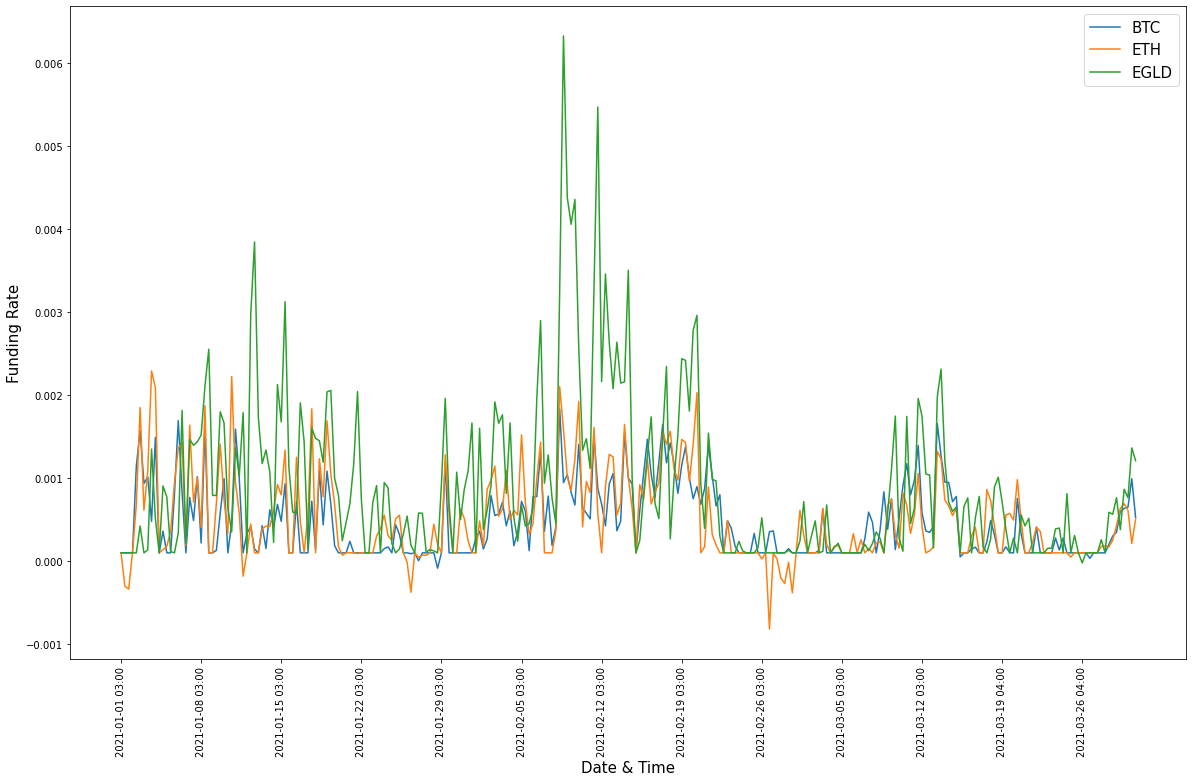

In [83]:
Graph([BTC,ETH,EGLD])

In [84]:
Describe(BTC)

,BTC
count,267.000000
mean,0.000459
std,0.000434
min,-0.000086
25%,0.000100
50%,0.000302
75%,0.000752
max,0.001837


In [85]:
Describe(ETH)

,ETH
count,267.000000
mean,0.000503
std,0.000532
min,-0.000818
25%,0.000100
50%,0.000331
75%,0.000741
max,0.002292


In [86]:
Describe(EGLD)

,EGLD
count,267.000000
mean,0.000915
std,0.000993
min,-0.000021
25%,0.000125
50%,0.000592
75%,0.001369
max,0.006331
